In [4]:
import numpy as np 
import pandas as pd 
#np.random.seed(1)
test  = pd.read_csv(r'C:\Users\welcome\Downloads\test.csv')
train = pd.read_csv(r'C:\Users\welcome\Downloads\train.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


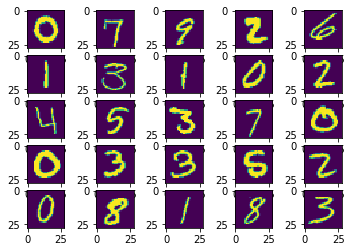

In [13]:
import math
import matplotlib.pyplot as plt
x, ax = plt.subplots(5,5)
for i in range(1,26):
    data = train.iloc[i,1:785].values 
    nrows, ncols = 28, 28
    grid = data.reshape((nrows, ncols))
    c=math.ceil(i/5)-1
    r=[0,1,2,3,4]*5
    ax[r[i-1], c].imshow(grid)

In [14]:
label_train=train['label']
train=train.drop('label', axis=1)
train = train / 255
test = test / 255
train['label'] = label_train

Text(0, 0.5, '% of variance explained')

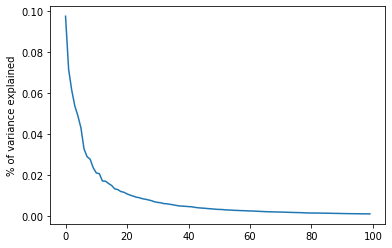

In [15]:
from sklearn import decomposition
from sklearn import datasets
pca = decomposition.PCA(n_components=100) #Finds first 200 PCs
pca.fit(train.drop('label', axis=1))
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('% of variance explained')

In [16]:
pca = decomposition.PCA(n_components=100)
pca.fit(train.drop('label', axis=1))
PCtrain = pd.DataFrame(pca.transform(train.drop('label', axis=1)))
PCtrain['label'] = train['label']
PCtest = pd.DataFrame(pca.transform(test))

In [25]:
from sklearn.neural_network import MLPClassifier
y = PCtrain['label'][0:2000]


In [26]:
X=PCtrain.drop('label', axis=1)[0:2000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-4,
                    hidden_layer_sizes=(300,), random_state=1)

In [27]:
clf.fit(X, y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [31]:
from sklearn import  metrics
#accuracy and confusion matrix
predicted = clf.predict(PCtrain.drop('label', axis=1)[20001:42000])
expected = PCtrain['label'][20001:42000]

print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(expected, predicted)))


Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(300,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2200
           1       0.95      0.97      0.96      2418
           2       0.88      0.92      0.90      2167
           3       0.90      0.89      0.90      2270
           4       0.90      0.92      0.91      2101
           5       0.88      0.88      0.88      2001
           6       0.93      0.95      0.94      2155
           7       0.93      0.93 

In [32]:
output = pd.DataFrame(clf.predict(PCtest), columns =['Label'])
output.reset_index(inplace=True)
output.rename(columns={'index': 'ImageId'}, inplace=True)
output['ImageId']=output['ImageId']+1
output.to_csv('submission.csv', index=False)